# Predictive Analytics - Diabetes Prediction 🍔

by: Sherly Santiadi

# Domain Proyek
---
Penderita diabetes beresiko lebih tinggi pada kasus pasien COVID-19. Oleh karena itu, pentingnya untuk mendeteksi sedini mungkin penyakit diabetes berdasarkan latar belakang historis sehingga dapat diberi perawatan yang tepat.

[Sumber Referensi](https://bapin-ismki.e-journal.id/jimki/article/view/342)

# Business Understanding
---

## Problem Statements
- Bagaimana membuat model untuk mengidentifikasi pasien yang beresiko diabetes?
- Bagaimana mengukur performa model untuk memprediksi pasien yang beresiko diabetes?

## Goals
- Membuat model untuk mengidentifikasi pasien yang beresiko diabetes.
- Mengukur performa model untuk memprediksi pasien yang beresiko diabetes.

## Solution Statements
- Membangun model `random forest` dengan menerapkan `hyperparameter tuning`
- Mengukur performa model dengan metrik evaluasi.

# Data Understanding
---
Data yang digunakan dalam proyek ini bersumber dari [Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).

Variabel-variabel pada Diabetes dataset adalah sebagai berikut:
- gender: mengacu pada jenis kelamin biologis individu, yang dapat berdampak pada kerentanan mereka terhadap diabetes. Ada tiga kategori di dalamnya pria, wanita dan lainnya.
- age: merupakan faktor penting karena diabetes lebih sering didiagnosis pada orang yang lebih tua. Rentang usia dari 0-80.
- hypertension: merupakan suatu kondisi medis di mana tekanan darah di arteri terus-menerus meningkat. Di dalam dataset ini terdapat nilai 0 atau 1 di mana 0 menunjukkan mereka tidak memiliki hipertensi dan untuk 1 itu berarti mereka memiliki hipertensi.
- heart_disease: merupakan suatu kondisi medis lain yang dikaitkan dengan peningkatan risiko diabetes. Di dalam dataset ini terdapat nilai 0 atau 1 dimana 0 menunjukkan mereka tidak memiliki penyakit jantung dan untuk 1 itu berarti mereka memiliki penyakit jantung.
- smoking_history: riwayat merokok juga dianggap sebagai faktor risiko diabetes dan dapat memperburuk komplikasi yang terkait dengan diabetes. Dalam dataset, terdapat 5 kategori yaitu tidak terkini, mantan, Tanpa Info, terkini, tidak pernah, dan selamanya.
- bmi: merupakan ukuran lemak tubuh berdasarkan berat dan tinggi badan. Nilai BMI yang lebih tinggi terkait dengan risiko diabetes yang lebih tinggi.
  - Kisaran BMI dalam dataset adalah dari 10.16 hingga 71.55.
  - BMI kurang dari 18.5 adalah kurus
  - BMI 18.5-24.9 adalah normal
  - BMI 25-29.9 adalah kelebihan berat badan
  - BMI 30 atau lebih adalah obesitas.
- HbA1c_level: kadar HbA1c (Hemoglobin A1c) adalah ukuran kadar gula darah rata-rata seseorang selama 2-3 bulan terakhir. Tingkat yang lebih tinggi menunjukkan risiko lebih besar terkena diabetes. Sebagian besar lebih dari 6,5% dari Tingkat HbA1c menunjukkan diabetes.
- blood_glucose_level: tingkat glukosa darah mengacu pada jumlah glukosa dalam aliran darah pada waktu tertentu. Kadar glukosa darah yang tinggi merupakan indikator utama diabetes.
- diabetes: diabetes adalah variabel target yang akan diprediksi, dengan nilai 1 menunjukkan adanya diabetes dan 0 menunjukkan tidak adanya diabetes.

# Library
---

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/Colab Notebooks/diabetes_prediction_dataset.csv"

Mounted at /content/drive


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Exploratory Data Analysis (EDA)
---

## Gathering Data

In [57]:
df = pd.read_csv(path)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Pada data yang digunakan dalam proyek ini terdapat `100.000 baris` dengan `9 kolom`.

## Assessing Data
- Apakah ada missing value?

In [58]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Pada data yang digunakan dalam proyek ini tidak terdapat missing value.

- Apakah ada data duplikat?

In [59]:
df.duplicated().sum()

3854

Pada data yang digunakan dalam proyek ini terdapat 3.854 data yang duplikat.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


- Terdapat 2 kolom dengan tipe object, yaitu: `gender` dan `smoking_history`. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 3 kolom numerik dengan tipe data float64 yaitu: `age`,`bmi`,`HbA1c_level`. Ini merupakan fitur numerik yang merupakan hasil pengukuran bertipe desimal.
- Terdapat 4 kolom numerik dengan tipe data int64, yaitu: `hypertension`,`heart_disease`,`blood_glucose_level`,`diabetes`. Ini merupakan fitur numerik yang merupakan hasil pengukuran bertipe integer.

## Menangani Data Duplikat
Pada proyek ini data duplikat akan dihapus dari dataframe.

In [61]:
df = df.drop_duplicates(keep='last')
df.duplicated().sum()

0

In [62]:
len(df)

96146

Setelah menghapus data duplikat data berkurang dari yang awalnya terdapat 10.000 data → 96.146 data.

## Describing Data

In [63]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [64]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

`df.nunique()` digunakan untuk mengetahui berapa banyak nilai unik di dalam setiap kolom.

In [65]:
df.gender.value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

Kolom `gender` terdapat 3 unik value yaitu `female`,`male`,`other`. Karena proporsi `other` jauh lebih sedikit dibandingkan `female` dan `male` maka akan dihapus.

In [66]:
# inplace = True untuk mengimplementasikan drop langsung ke dataframe original
df.drop(df[df['gender']=='Other'].index , inplace=True)
df.gender.value_counts()

<ipython-input-66-cc81039b68f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['gender']=='Other'].index , inplace=True)


Female    56161
Male      39967
Name: gender, dtype: int64

In [67]:
df.age.value_counts()

80.00    4932
51.00    1566
47.00    1509
48.00    1508
53.00    1497
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

## Mengubah Tipe Data

Kolom `age` terdapat usia dengan tipe data desimal, oleh karena itu tipe data kolom `age` akan diubah menjadi integer.

In [68]:
df['age'] = df['age'].astype(int)
df.age.value_counts()

<ipython-input-68-7baecf3073ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


80    4932
51    1566
47    1509
48    1508
53    1497
      ... 
76     724
77     719
75     712
78     670
79     607
Name: age, Length: 81, dtype: int64

In [69]:
df.smoking_history.value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

<ipython-input-70-013f27b25eef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


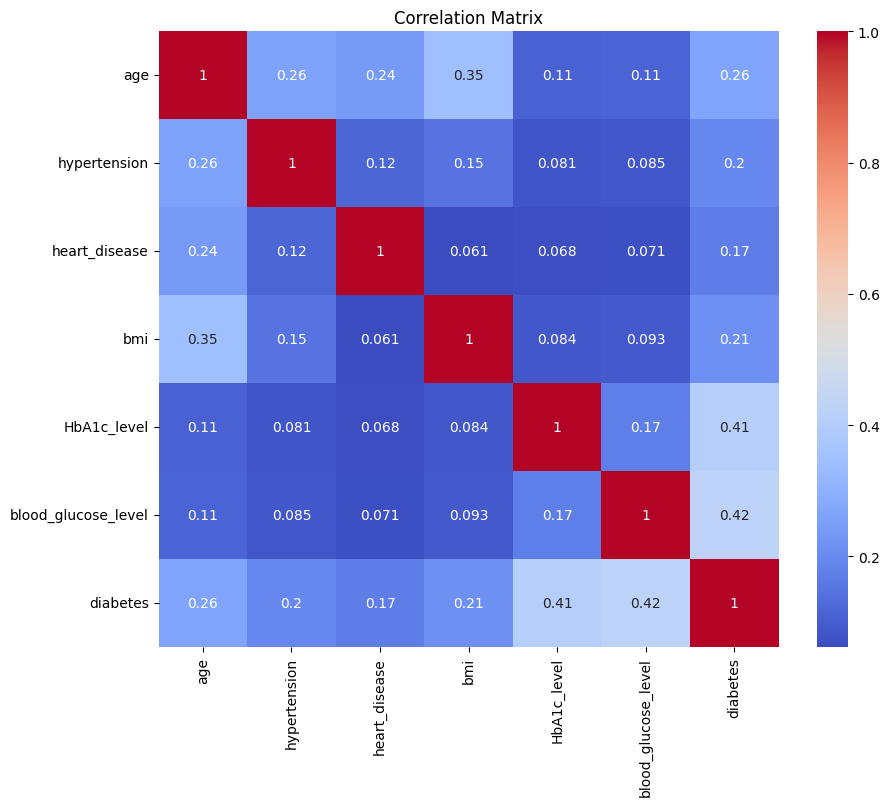

In [70]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

Dari matriks korelasi ditemukan bahwa kolom yang memiliki korelasi positif dengan kolom `diabetes` diurutkan dari yang paling kuat hingga lemah sebagai berikut:
1. `blood_glucose_level`
2. `HbA1c_level`
3. `age`
4. `bmi`
5. `hypertension`
6. `heart_disease`

Pada kolom `smoking_history` terdapat value `No Info` yang cukup banyak yaitu sebesar 32.881.

## Mengubah Kolom Kategorikal

Karena pada kolom `smoking_history` terdapat pengkategorian yang mirip maka untuk kategori yang mirip akan dikelompokan ke dalam satu kategori yang sama sehingga data tersebut lebih terorganisir.

In [71]:
def kategori_smoking_history(label):
    if label in ["not current", "former","ever"]:
        return 'Past'
    elif label in["never","No info", "None"]:
        return "Never"
    elif label =='current':
        return 'Current'
df["smoking_history"] = df["smoking_history"].apply(kategori_smoking_history)
df.smoking_history.value_counts()

<ipython-input-71-4004898c2cfa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoking_history"] = df["smoking_history"].apply(kategori_smoking_history)


Never      34395
Past       19655
Current     9197
Name: smoking_history, dtype: int64

## Melihat Distribusi Kolom

Text(0.5, 0, 'Name')

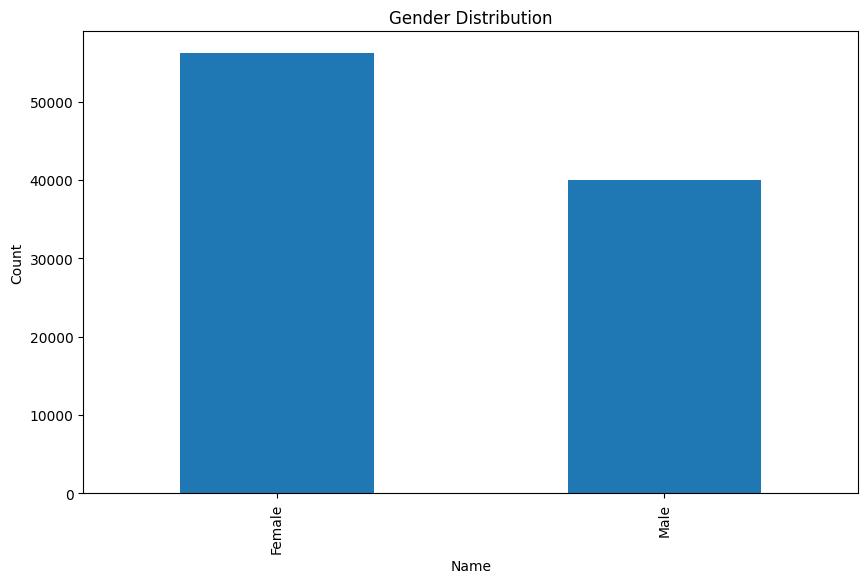

In [72]:
df["gender"].value_counts().plot(kind="bar", figsize=(10,6))
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Name")

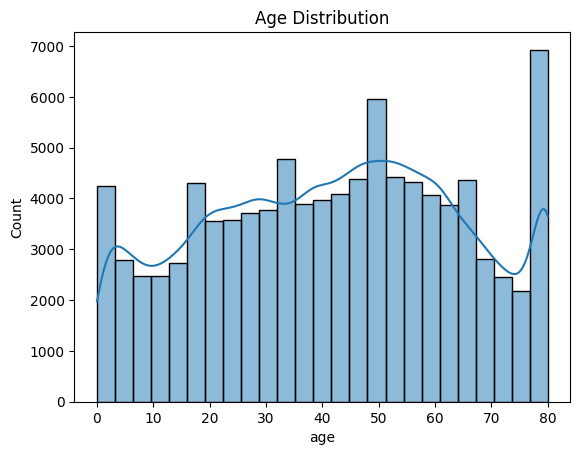

In [73]:
sns.histplot(df["age"],kde=True,bins=25)
plt.title("Age Distribution");

Text(0.5, 0, 'Name')

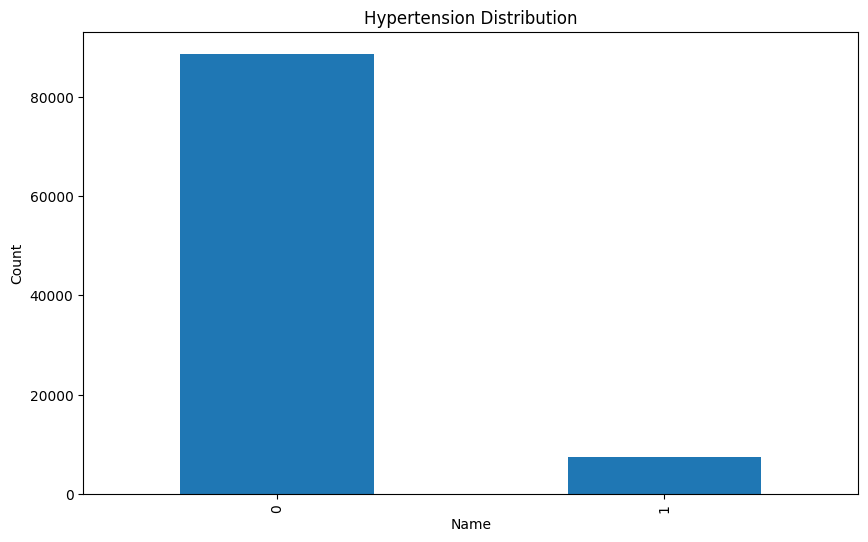

In [74]:
df["hypertension"].value_counts().plot(kind="bar", figsize=(10,6))
plt.title("Hypertension Distribution")
plt.ylabel("Count")
plt.xlabel("Name")

Text(0.5, 0, 'Name')

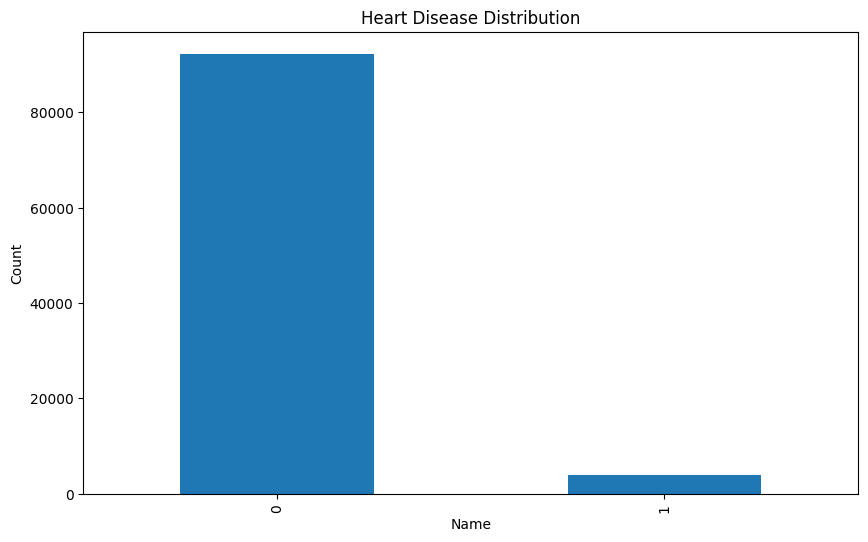

In [75]:
df["heart_disease"].value_counts().plot(kind="bar", figsize=(10,6))
plt.title("Heart Disease Distribution")
plt.ylabel("Count")
plt.xlabel("Name")

Text(0.5, 0, 'Name')

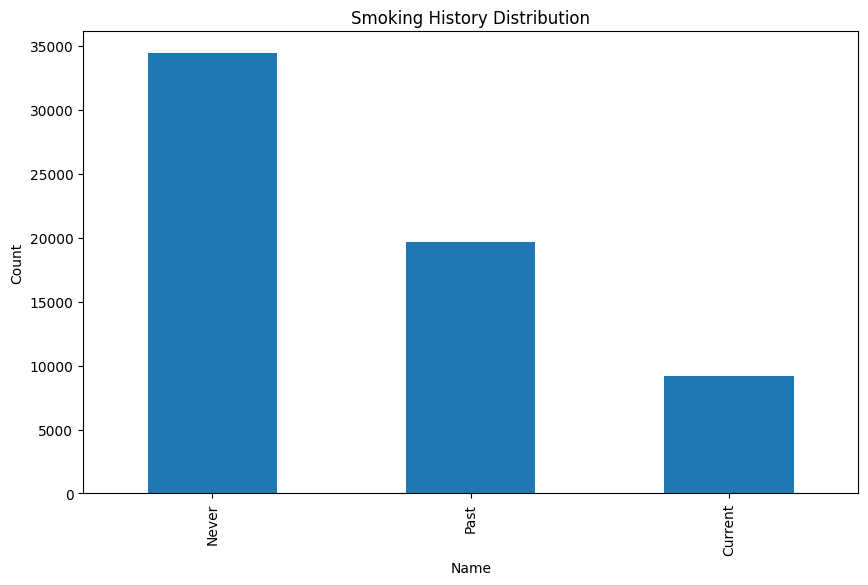

In [76]:
df["smoking_history"].value_counts().plot(kind="bar", figsize=(10,6))
plt.title("Smoking History Distribution")
plt.ylabel("Count")
plt.xlabel("Name")

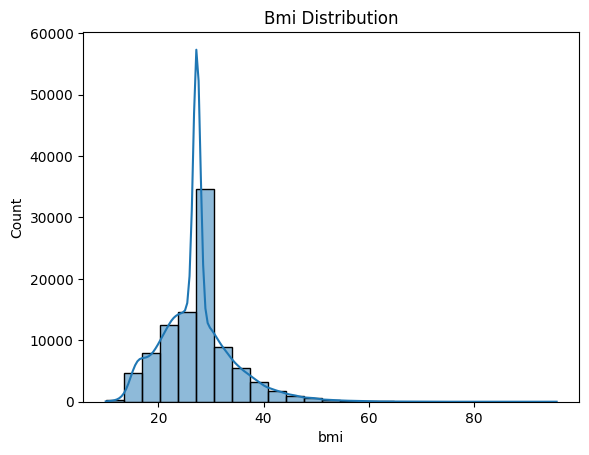

In [77]:
sns.histplot(df["bmi"],kde=True,bins=25)
plt.title("Bmi Distribution");

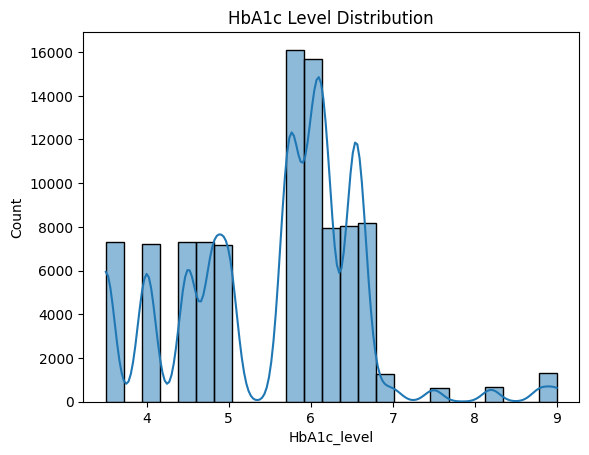

In [78]:
sns.histplot(df["HbA1c_level"],kde=True,bins=25)
plt.title("HbA1c Level Distribution");

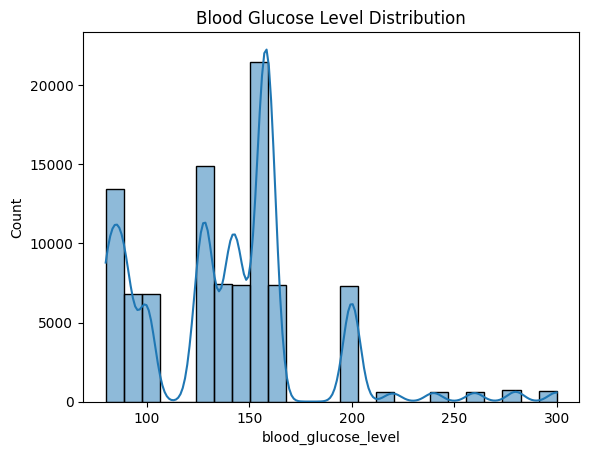

In [79]:
sns.histplot(df["blood_glucose_level"],kde=True,bins=25)
plt.title("Blood Glucose Level Distribution");

Text(0.5, 0, 'Name')

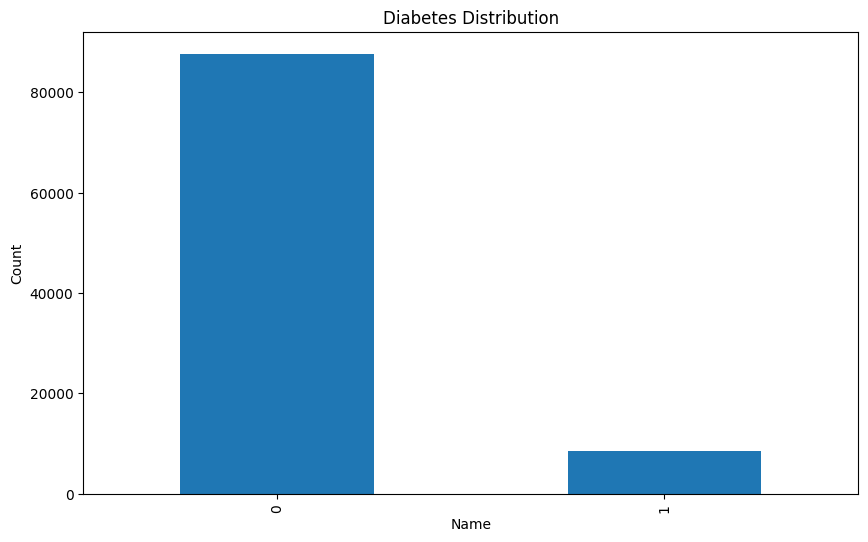

In [80]:
df["diabetes"].value_counts().plot(kind="bar", figsize=(10,6))
plt.title("Diabetes Distribution")
plt.ylabel("Count")
plt.xlabel("Name")

Dari grafik di atas ditemukan bahwa kolom `diabetes` sangat tidak seimbang mengingat kolom dengan nilai 0 berjumlah > 80.000 sedangkan kolom dengan nilai 1 berjumlah < 20.000

<Axes: xlabel='diabetes', ylabel='age'>

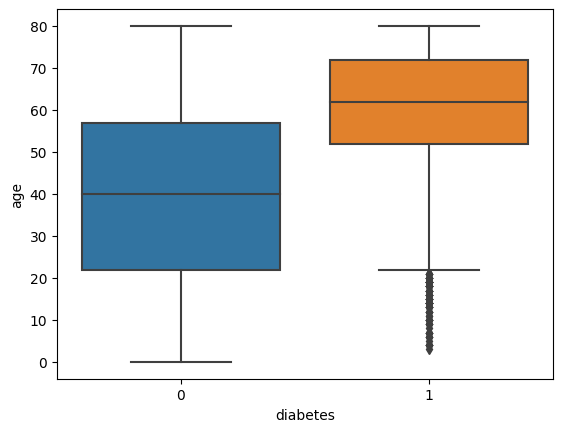

In [81]:
sns.boxplot(data= df, x=df["diabetes"], y=df["age"])

Dari grafik di atas dapat diketahui bahwa rentang umur seseorang mengalami diabetes yaitu diantara `50 - 80`.

In [82]:
df.reset_index(drop=True, inplace=True)
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.786046,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.482594,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Pada data yang digunakan dalam proyek ini terdapat outliers, namun outliers tersebut tidak akan dihapus dikarenakan akan mempengaruhi kolom-kolom biner lainnya seperti pada kolom `hypertension` menjadi hanya memiliki nilai 0 saja.

In [83]:
# Drop baris dengan nilai 'age' = 0 dikarenakan usia 0 tidak relevan untuk digunakan
df = df.loc[(df[['age']]!=0).all(axis=1)]
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,95218.000000,95218.000000,95218.000000,95218.000000,95218.000000,95218.000000,95218.00000
mean,42.185396,0.078357,0.041200,27.417477,5.534337,138.268426,0.08908
std,22.213756,0.268734,0.198754,6.717427,1.073849,40.968341,0.28486
min,1.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.00000
25%,24.000000,0.000000,0.000000,23.550000,4.800000,100.000000,0.00000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.00000
75%,60.000000,0.000000,0.000000,29.930000,6.200000,159.000000,0.00000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.00000


# Data Preparation
---


Sebelum melakukan manipulasi data atau konversi data ke dalam data numerik, data sebaiknya dipisahkan terlebih dahulu untuk mencegah kebocoran data.

In [84]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,Never,25.19,6.6,140,0
1,Male,28,0,0,Never,27.32,5.7,158,0
2,Female,36,0,0,Current,23.45,5.0,155,0
3,Male,76,1,1,Current,20.14,4.8,155,0
4,Female,20,0,0,Never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
96123,Female,80,0,0,None,27.32,6.2,90,0
96124,Female,2,0,0,None,17.37,6.5,100,0
96125,Male,66,0,0,Past,27.83,5.7,155,0
96126,Female,24,0,0,Never,35.42,4.0,100,0


In [85]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [86]:
# split data menjadi training dan testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split data training menjadi training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Jumlah X_train: ", X_train.shape)
print("Jumlah y_train: ", y_train.shape)
print("Jumlah X_val: ", X_val.shape)
print("Jumlah y_val: ", y_val.shape)
print("Jumlah X_test: ", X_test.shape)
print("Jumlah y_test: ", y_test.shape)

Jumlah X_train:  (60939, 8)
Jumlah y_train:  (60939,)
Jumlah X_val:  (15235, 8)
Jumlah y_val:  (15235,)
Jumlah X_test:  (19044, 8)
Jumlah y_test:  (19044,)


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60939 entries, 58 to 54238
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               60939 non-null  object 
 1   age                  60939 non-null  int64  
 2   hypertension         60939 non-null  int64  
 3   heart_disease        60939 non-null  int64  
 4   smoking_history      40434 non-null  object 
 5   bmi                  60939 non-null  float64
 6   HbA1c_level          60939 non-null  float64
 7   blood_glucose_level  60939 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 4.2+ MB


## One Hot Encoding

In [88]:
obj = (X.dtypes == 'object')
object_column_X = list(obj[obj].index)
object_column_X

['gender', 'smoking_history']

In [89]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_train[object_column_X])
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_train.index
X_train_numerical = X_train.drop(object_column_X, axis=1)
X_train_encoded = pd.concat([X_train_numerical, df_encoded], axis=1)
X_train_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,0,1,2,3,4,5
58,13,0,0,28.16,5.0,90,1.0,0.0,0.0,0.0,0.0,1.0
14588,58,0,0,27.32,5.7,159,1.0,0.0,0.0,1.0,0.0,0.0
86794,55,0,0,25.36,5.8,80,1.0,0.0,0.0,1.0,0.0,0.0
42703,74,0,0,43.55,6.2,130,1.0,0.0,0.0,0.0,0.0,1.0
49249,77,0,0,27.32,4.8,158,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45060,68,0,1,27.47,4.5,80,1.0,0.0,1.0,0.0,0.0,0.0
777,39,0,0,27.04,6.1,140,0.0,1.0,1.0,0.0,0.0,0.0
53197,27,0,0,23.05,6.1,159,1.0,0.0,0.0,1.0,0.0,0.0
50806,14,0,0,19.13,6.1,145,0.0,1.0,0.0,0.0,0.0,1.0


In [90]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_val[object_column_X])
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_val.index
X_val_numerical = X_val.drop(object_column_X, axis=1)
X_val_encoded = pd.concat([X_val_numerical, df_encoded], axis=1)
X_val_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,0,1,2,3,4,5
23840,15,0,0,23.40,5.0,160,0.0,1.0,0.0,1.0,0.0,0.0
88007,54,0,0,26.00,6.0,80,1.0,0.0,0.0,0.0,0.0,1.0
88125,63,0,0,26.70,4.5,90,0.0,1.0,0.0,0.0,0.0,1.0
52110,64,1,0,43.87,4.5,155,1.0,0.0,0.0,0.0,1.0,0.0
53734,51,0,0,23.67,6.6,90,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96023,74,0,0,27.32,3.5,85,0.0,1.0,0.0,0.0,1.0,0.0
89311,80,0,0,22.45,6.0,126,0.0,1.0,0.0,1.0,0.0,0.0
60742,25,0,0,42.42,3.5,160,1.0,0.0,0.0,0.0,0.0,1.0
66335,28,0,0,33.30,4.0,159,1.0,0.0,0.0,0.0,0.0,1.0


In [91]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_test[object_column_X])
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_test.index
X_test_numerical = X_test.drop(object_column_X, axis=1)
X_test_encoded = pd.concat([X_test_numerical, df_encoded], axis=1)
X_test_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,0,1,2,3,4,5
41196,24,0,0,28.50,5.8,85,0.0,1.0,0.0,1.0,0.0,0.0
60594,69,0,0,22.76,5.8,80,1.0,0.0,0.0,1.0,0.0,0.0
87583,80,0,1,31.75,5.7,158,0.0,1.0,0.0,0.0,1.0,0.0
10440,52,0,0,31.53,6.1,200,1.0,0.0,0.0,1.0,0.0,0.0
3470,21,0,0,20.66,5.8,100,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22870,73,0,0,27.32,6.0,145,1.0,0.0,0.0,0.0,1.0,0.0
14512,48,0,0,26.57,4.8,140,1.0,0.0,0.0,1.0,0.0,0.0
20421,57,0,0,38.00,4.5,90,1.0,0.0,0.0,1.0,0.0,0.0
21478,24,0,0,27.32,6.6,159,1.0,0.0,1.0,0.0,0.0,0.0


## Standarisasi

In [92]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60939 entries, 58 to 54238
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  60939 non-null  int64  
 1   hypertension         60939 non-null  int64  
 2   heart_disease        60939 non-null  int64  
 3   bmi                  60939 non-null  float64
 4   HbA1c_level          60939 non-null  float64
 5   blood_glucose_level  60939 non-null  int64  
 6   0                    60939 non-null  float64
 7   1                    60939 non-null  float64
 8   2                    60939 non-null  float64
 9   3                    60939 non-null  float64
 10  4                    60939 non-null  float64
 11  5                    60939 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 6.0 MB


In [93]:
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()

In [94]:
scaler.fit(X_train_encoded[numerical_features])
X_train_encoded[numerical_features] = scaler.transform(X_train_encoded.loc[:, numerical_features])
X_train_encoded[numerical_features].describe().round(4)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,60939.0000,60939.0000,60939.0000,60939.0000,60939.0000,60939.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.8500,-0.2904,-0.2057,-2.5799,-1.8949,-1.4224
25%,-0.8158,-0.2904,-0.2057,-0.5764,-0.6840,-0.9352
50%,0.0385,-0.2904,-0.2057,-0.0147,0.2474,0.0392
75%,0.8029,-0.2904,-0.2057,0.3706,0.6199,0.5020
max,1.7022,3.4441,4.8613,10.1172,3.2279,3.9368


In [95]:
scaler.fit(X_val[numerical_features])
X_val_encoded[numerical_features] = scaler.transform(X_val_encoded.loc[:, numerical_features])
X_val_encoded[numerical_features].describe().round(4)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,15235.0000,15235.0000,15235.0000,15235.0000,15235.0000,15235.0000
mean,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.8566,-0.2923,-0.2116,-2.6029,-1.8821,-1.4200
25%,-0.8214,-0.2923,-0.2116,-0.5827,-0.6746,-0.9296
50%,0.0337,-0.2923,-0.2116,-0.0068,0.2542,0.0513
75%,0.7989,-0.2923,-0.2116,0.3827,0.6257,0.5173
max,1.6990,3.4215,4.7255,9.1439,3.2265,3.9750


In [96]:
scaler.fit(X_test[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded.loc[:, numerical_features])
X_test_encoded[numerical_features].describe().round(4)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,19044.0000,19044.0000,19044.0000,19044.0000,19044.0000,19044.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.8651,-0.2949,-0.2089,-2.5984,-1.9030,-1.4237
25%,-0.8256,-0.2949,-0.2089,-0.5741,-0.6906,-0.9341
50%,0.0331,-0.2949,-0.2089,-0.0199,0.2420,0.0450
75%,0.8014,-0.2949,-0.2089,0.3748,0.6150,0.5101
max,1.7053,3.3906,4.7880,10.0944,3.2263,3.9614


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

## Resampling

In [97]:
X_train_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,0,1,2,3,4,5
58,-1.310440,-0.290352,-0.205708,0.109768,-0.497758,-1.178843,1.0,0.0,0.0,0.0,0.0,1.0
14588,0.712990,-0.290352,-0.205708,-0.014714,0.154235,0.502013,1.0,0.0,0.0,1.0,0.0,0.0
86794,0.578094,-0.290352,-0.205708,-0.305170,0.247377,-1.422445,1.0,0.0,0.0,1.0,0.0,0.0
42703,1.432431,-0.290352,-0.205708,2.390440,0.619945,-0.204433,1.0,0.0,0.0,0.0,0.0,1.0
49249,1.567326,-0.290352,-0.205708,-0.014714,-0.684042,0.477653,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45060,1.162641,-0.290352,4.861252,0.007515,-0.963468,-1.422445,1.0,0.0,1.0,0.0,0.0,0.0
777,-0.141347,-0.290352,-0.205708,-0.056207,0.526803,0.039169,0.0,1.0,1.0,0.0,0.0,0.0
53197,-0.680928,-0.290352,-0.205708,-0.647493,0.526803,0.502013,1.0,0.0,0.0,1.0,0.0,0.0
50806,-1.265475,-0.290352,-0.205708,-1.228405,0.526803,0.160970,0.0,1.0,0.0,0.0,0.0,1.0


In [98]:
X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_val_encoded.columns = X_val_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

# Kelas minoritas akan ditingkatkan 10% dari total dataset
smote = SMOTE(sampling_strategy = 0.1)
# Kelas majoritas akan ditingkatkan 50% dari total dataset
random_under_sampling = RandomUnderSampler(sampling_strategy=0.5)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)
X_train_resampled, y_train_resampled = random_under_sampling.fit_resample(X_train_resampled, y_train_resampled)

# Modeling
---

Pada tahapan pemodelan ini, kita menggunakan algoritma Random Forest Classifier untuk menyelesaikan permasalahan dalam proyek "Diabetes Prediction".

Tahapan yang dilakukan dalam pemodelan ini adalah sebagai berikut:
- Membentuk model awal: Pertama, kita membuat model awal dengan menggunakan RandomForestClassifier tanpa mengatur parameter apapun. Model awal ini digunakan untuk melatih data yang telah diresampling `(X_train_resampled)` dan `(y_train_resampled)`.
- Penentuan parameter: Setelah itu, kita menentukan parameter-parameter yang akan digunakan pada model Random Forest. Dalam contoh ini, kita menggunakan RandomizedSearchCV untuk mencari parameter terbaik dengan mencoba beberapa kombinasi secara acak. Parameter yang diuji adalah jumlah estimators `(n_estimators)`, kedalaman maksimum `(max_depth)`, minimum sampel split `(min_samples_split)`, dan minimum sampel leaf `(min_samples_leaf)`. Parameter-parameter ini digunakan untuk meningkatkan performa model dan menghindari overfitting.
- Pencarian parameter terbaik: Pada langkah ini, RandomizedSearchCV mencoba beberapa kombinasi parameter yang dijelaskan di atas dengan melakukan validasi silang `(cross-validation)` menggunakan 5-fold cross-validation `(cv=5)`. Dalam hal ini, RandomizedSearchCV mencoba 10 kombinasi parameter yang berbeda `(n_iter=10)` dan mencatat performa model untuk setiap kombinasi.
- Memilih model terbaik: Setelah melakukan pencarian parameter, kita memilih model terbaik berdasarkan performa yang diukur. Model terbaik ini akan digunakan untuk melatih data yang telah dilakukan one hot encoding `(X_train_encoded)` dan target `(y_train)`.

In [99]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

## Hyperparameter Tuning
Proses improvement melalui hyperparameter tuning:

Dalam langkah hyperparameter tuning, RandomizedSearchCV digunakan untuk mencari kombinasi terbaik dari parameter-parameter yang diuji. Dalam contoh ini, kita mencari nilai terbaik untuk n_estimators, max_depth, min_samples_split, dan min_samples_leaf.

Dengan melakukan hyperparameter tuning, kita dapat meningkatkan performa model dengan menemukan parameter yang optimal. Parameter yang optimal dapat membantu menghindari overfitting, meningkatkan akurasi, dan menghasilkan model yang lebih baik secara keseluruhan.

Setelah proses hyperparameter tuning, kita mendapatkan model terbaik `(rf_best)` yang kemudian dilatih menggunakan data yang telah dilakukan one hot encoding `(X_train_encoded)` dan target `(y_train)`. Model terbaik ini kemudian dapat digunakan untuk melakukan prediksi pada data yang baru.

In [100]:
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [101]:
random_search = RandomizedSearchCV(random_forest, param_distributions, n_iter=10, cv=5, error_score='raise')
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [102]:
rf_best = random_search.best_estimator_
rf_best.fit(X_train_encoded, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

# Evaluation
---
Dalam proyek ini, kita menggunakan beberapa metrik evaluasi untuk kasus klasifikasi, yaitu akurasi, presisi, recall, dan skor F1. Berikut adalah penjelasan singkat mengenai metrik-metrik tersebut:

- Akurasi: Metrik ini mengukur sejauh mana model dapat mengklasifikasikan data dengan benar secara keseluruhan. Akurasi dihitung dengan membagi jumlah prediksi yang benar dengan total jumlah prediksi.

- Presisi: Presisi mengukur sejauh mana model memberikan hasil positif yang benar dari semua prediksi positif yang dilakukan. Presisi dihitung dengan membagi jumlah prediksi positif yang benar dengan jumlah total prediksi positif.

- Recall: Recall, juga dikenal sebagai sensitivitas, mengukur sejauh mana model dapat mengidentifikasi secara benar semua instance positif yang ada dalam dataset. Recall dihitung dengan membagi jumlah prediksi positif yang benar dengan jumlah total instance positif yang sebenarnya.

- Skor F1: Skor F1 adalah rata-rata harmonik antara presisi dan recall. Skor F1 berguna untuk memperhitungkan baik presisi maupun recall dalam satu metrik yang konsisten. Skor F1 dihitung dengan menggunakan formula: 2 * (presisi * recall) / (presisi + recall).

In [103]:
y_pred = rf_best.predict(X_val_encoded)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13884
           1       0.99      0.68      0.81      1351

    accuracy                           0.97     15235
   macro avg       0.98      0.84      0.90     15235
weighted avg       0.97      0.97      0.97     15235



In [104]:
y_test_pred = rf_best.predict(X_test_encoded)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17349
           1       0.98      0.68      0.81      1695

    accuracy                           0.97     19044
   macro avg       0.98      0.84      0.90     19044
weighted avg       0.97      0.97      0.97     19044



Berdasarkan hasil proyek dan metrik evaluasi yang digunakan, kita dapat melihat bahwa model yang telah dilatih memberikan hasil yang baik. Berikut adalah analisis berdasarkan metrik-metrik evaluasi yang digunakan:

- Akurasi: Model memiliki akurasi sebesar 97% pada data validasi (15235 sampel) dan 97% pada data pengujian (19044 sampel). Ini berarti model dapat mengklasifikasikan data dengan benar dengan tingkat akurasi yang tinggi.

- Presisi: Model memiliki presisi sebesar 97% untuk kelas 0 (tidak diabetes) dan 100% untuk kelas 1 (diabetes) pada data validasi dan data pengujian. Hal ini menunjukkan bahwa model memberikan sedikit sekali kesalahan dalam mengklasifikasikan data sebagai kelas 0 atau kelas 1.

- Recall: Model memiliki recall sebesar 100% untuk kelas 0 dan 68% untuk kelas 1 pada data validasi dan data pengujian. Ini berarti model mampu mengidentifikasi secara benar semua instance yang termasuk dalam kelas 0, tetapi memiliki tingkat recall yang lebih rendah untuk kelas 1.

- F1 Score: F1 Score untuk kelas 0 adalah 98% pada data validasi dan data pengujian, sementara untuk kelas 1 adalah 81% pada data validasi dan data pengujian. F1 Score yang tinggi menunjukkan keseimbangan antara presisi dan recall.

Secara keseluruhan, model `Random Forest Classifier` yang telah dilatih memberikan hasil yang baik dengan tingkat akurasi yang tinggi dan presisi yang baik untuk kedua kelas.

Namun, terdapat penurunan recall dan F1 Score untuk kelas 1, yang dapat menunjukkan bahwa model memiliki kesulitan dalam mengidentifikasi instance-instance yang termasuk dalam kelas 1.

---

Dalam kasus prediksi diabetes, perlu mempertimbangkan apakah fokus yang lebih penting:
- Mengidentifikasi sebanyak mungkin pasien yang benar-benar menderita diabetes (recall tinggi).
- Meminimalkan jumlah kesalahan dalam mengklasifikasikan pasien yang sehat sebagai pasien diabetes (presisi tinggi).

Jika kita lebih peduli untuk mengidentifikasi sebanyak mungkin pasien yang benar-benar menderita diabetes, maka recall yang tinggi lebih penting. Recall yang tinggi berarti model memiliki kemampuan yang baik dalam menemukan pasien diabetes yang sebenarnya dan mengklasifikasikannya dengan benar. Dalam hal ini, kita berusaha untuk menghindari kesalahan mengklasifikasikan pasien diabetes sebagai sehat.

Namun, jika fokus lebih pada menghindari kesalahan mengklasifikasikan pasien sehat sebagai pasien diabetes, maka presisi yang tinggi lebih penting. Presisi yang tinggi berarti model memiliki kemampuan yang baik dalam memastikan bahwa pasien yang diklasifikasikan sebagai diabetes adalah pasien yang benar-benar menderita diabetes. Dalam hal ini, kita berusaha untuk menghindari kesalahan mengklasifikasikan pasien sehat sebagai diabetes.

## ROC Curve
ROC Curve digunakan untuk mengilustasikan trade-off antara true positive rate (TPR) dan false positive rate (FPR) pada berbagai threshold klasifikasi.

[[0.99023444 0.00976556]]


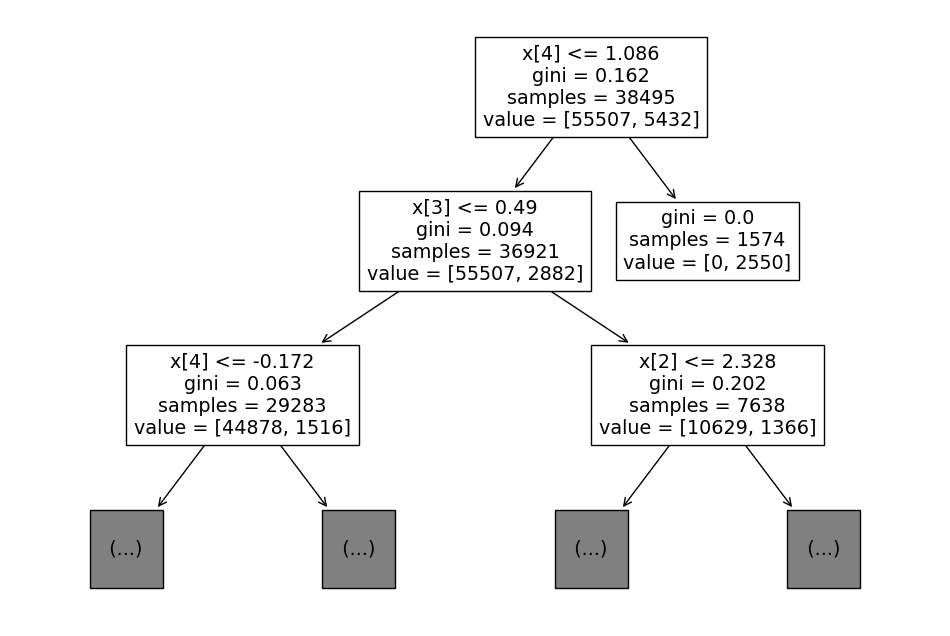

In [105]:
# Plot decision tree pertama di random forest
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(rf_best.estimators_[0], max_depth=2, ax=ax)

# Untuk memvisualisasikan probabilitas kelas di setiap node, gunakan metode `predict_proba` di seluruh random forest
# Misalnya untuk memprediksi probabilitas kelas untuk contoh pertama dalam test set:
probs = rf_best.predict_proba(X_test_encoded[:1])
print(probs)

In [106]:
X_test[:1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
41196,Male,24,0,0,Never,28.5,5.8,85


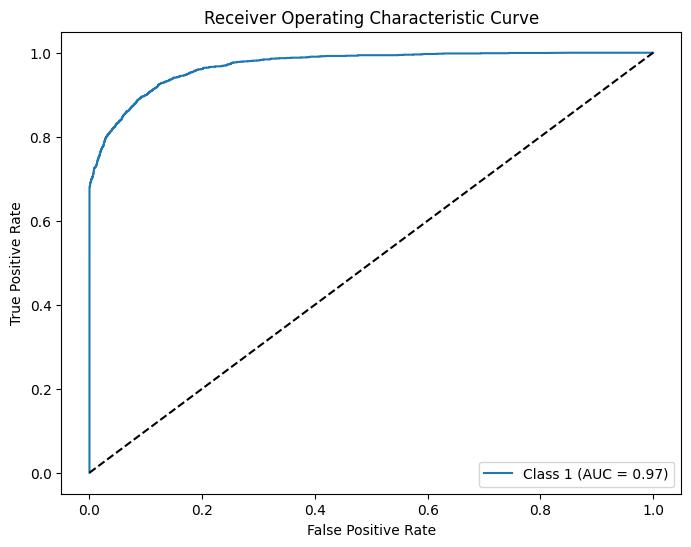

In [107]:
# Memprediksi probabilitas kelas untuk kelas positif (kelas 1)
y_pred_proba = rf_best.predict_proba(X_test_encoded)[:, 1]

# Hitung kurva ROC dan AUC untuk kelas positif
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Class 1 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

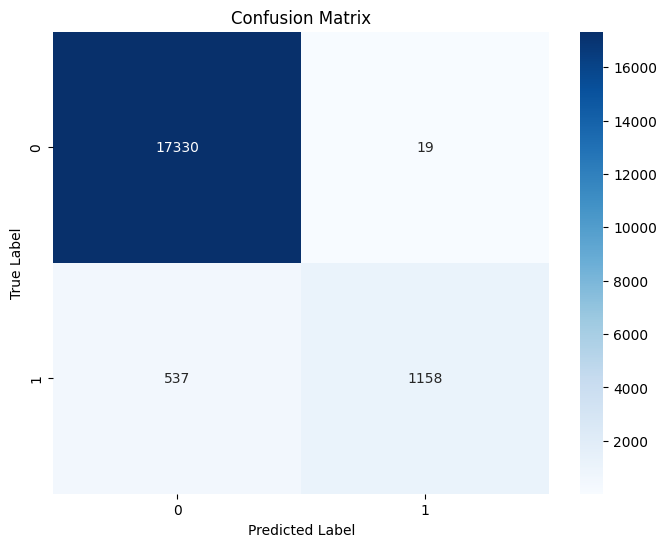

In [108]:
# Hitung confusion matrix
y_pred = rf_best.predict(X_test_encoded)
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Conclusion
---
- Membuat model random forest dengan menerapkan hyperparameter tuning yaitu menggunakan randomized search dapat mengidentifikasi pasien yang beresiko diabetes.
- Hasil `F1-Score` model random forest pada test set sebesar 97%.